In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
df_anemia = pd.read_csv("/content/TB_DIGTEL_ANEMIA_ATENDIDOS.csv")
df_anemia.head(10)

,id_ubigeo,id_persona,Edad,Tipo_edad,Sexo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess
0,1434.0,41260175,2,A,F,20190111,00a-11a,D509,D,6021
1,436.0,41281917,6,M,M,20190114,00a-11a,D509,R,7231
2,436.0,41256991,6,M,M,20190114,00a-11a,D509,D,7231
3,338.0,41281945,2,A,M,20190125,00a-11a,D509,R,1238
4,1274.0,41287396,1,A,F,20190122,00a-11a,D509,D,4432
5,1160.0,41265118,75,A,M,20190121,60a+,D509,P,5195
6,1465.0,41260171,1,A,M,20190116,00a-11a,D509,R,17015
7,426.0,41275729,2,A,M,20190105,00a-11a,D509,R,1414
8,1460.0,41260125,6,M,F,20190116,00a-11a,D509,D,16
9,1281.0,41261546,3,M,M,20190105,00a-11a,D509,D,6203


In [20]:
df_anemia.dropna(inplace=True)

In [21]:
df_anemia = (
    df_anemia.assign(
        sexo_num = lambda df: df.Sexo.replace(["F","M"],[0,1])
    )
)
df_anemia

,id_ubigeo,id_persona,Edad,Tipo_edad,Sexo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,sexo_num
0,1434.0,41260175,2,A,F,20190111,00a-11a,D509,D,6021,0
1,436.0,41281917,6,M,M,20190114,00a-11a,D509,R,7231,1
2,436.0,41256991,6,M,M,20190114,00a-11a,D509,D,7231,1
3,338.0,41281945,2,A,M,20190125,00a-11a,D509,R,1238,1
4,1274.0,41287396,1,A,F,20190122,00a-11a,D509,D,4432,0
...,...,...,...,...,...,...,...,...,...,...,...
405267,1316.0,29639882,40,A,F,20230124,30a-59a,D509,P,6195,0
405268,1314.0,37658561,14,A,F,20230206,12a-17a,D509,P,6177,0
405269,1283.0,21330668,30,A,F,20230228,30a-59a,D571,D,6198,0
405270,1283.0,21330668,30,A,F,20230224,30a-59a,D571,D,6204,0


In [22]:
df_anemia["anemia"] = df_anemia["Diagnostico"].apply(lambda x: 1 if x=="D509" else 0)
df_anemia

,id_ubigeo,id_persona,Edad,Tipo_edad,Sexo,Fecha_atencion,Etapa,Diagnostico,Tipo_Dx,id_eess,sexo_num,anemia
0,1434.0,41260175,2,A,F,20190111,00a-11a,D509,D,6021,0,1
1,436.0,41281917,6,M,M,20190114,00a-11a,D509,R,7231,1,1
2,436.0,41256991,6,M,M,20190114,00a-11a,D509,D,7231,1,1
3,338.0,41281945,2,A,M,20190125,00a-11a,D509,R,1238,1,1
4,1274.0,41287396,1,A,F,20190122,00a-11a,D509,D,4432,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
405267,1316.0,29639882,40,A,F,20230124,30a-59a,D509,P,6195,0,1
405268,1314.0,37658561,14,A,F,20230206,12a-17a,D509,P,6177,0,1
405269,1283.0,21330668,30,A,F,20230228,30a-59a,D571,D,6198,0,0
405270,1283.0,21330668,30,A,F,20230224,30a-59a,D571,D,6204,0,0


In [23]:
anemia_procesado_df = df_anemia[["Edad", "sexo_num", "anemia"]]
anemia_procesado_df.head()

,Edad,sexo_num,anemia
0,2,0,1
1,6,1,1
2,6,1,1
3,2,1,1
4,1,0,1


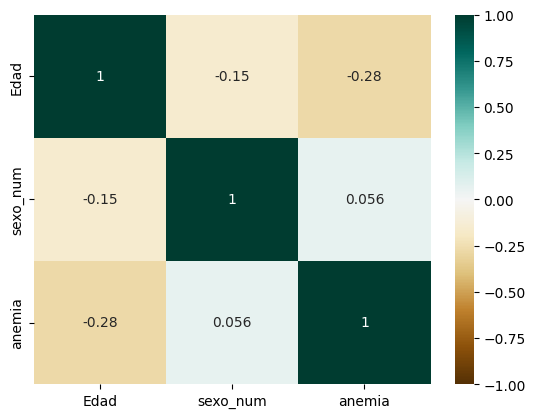

In [24]:
sns.heatmap(
    data=anemia_procesado_df.corr(numeric_only=True),
    annot=True,
    vmin=-1,
    vmax=1,
    cmap="BrBG"
)
plt.show()

In [35]:
model_anemia = smf.logit(
    data=anemia_procesado_df,
    formula="anemia ~ Edad + sexo_num"
).fit()
model_anemia.summary()

Optimization terminated successfully.
         Current function value: 0.289202
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 anemia   No. Observations:               402030
Model:                          Logit   Df Residuals:                   402027
Method:                           MLE   Df Model:                            2
Date:                Sat, 16 Nov 2024   Pseudo R-squ.:                 0.08901
Time:                        00:56:48   Log-Likelihood:            -1.1627e+05
converged:                       True   LL-Null:                   -1.2763e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7662      0.009    302.464      0.000       2.748       2.784
Edad          -0.0322      0.000   -153.288      0.000      -0.033      -0.032
sexo_num       0.1759      0.012     15.286      0.000       0.153       0.198
==============================================================================
"""

In [34]:
anemia_predictions = pd.DataFrame(
    dict(
        actual_value = anemia_procesado_df.anemia,
        predicted_value = model_anemia.predict().round()
    )
)

In [ ]:
conf_matrix = confusion_matrix(anemia_predictions.actual_value, anemia_predictions.predicted_value)
sns.heatmap(data=conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.show()

Ejemplo de lo que pasa con la exactitud cuando el dataset está desbalanceado.

In [37]:
acc_score = accuracy_score(anemia_predictions.actual_value, anemia_predictions.predicted_value)
acc_score

0.9022784369325673